Basic Random Forest multiclass regression with default (3, 3) parameter FV on only the MFCC features.

In [1]:
import os
import scipy.io as spio
import numpy as np
from os.path import join, isdir, isfile
%matplotlib inline
import matplotlib.pyplot as plt
# In-python Chroma extraction (may not be necessary if we use MATLAB-only)
DATA_DIR='../data'

# 'file_name' 'class_name' 'class' 'eng' 'mfc' 'chroma' 't'
# 'keystrength' 'brightness' 'zerocross' 'roughness' 'inharmonic' 'hcdf'

def pad(nparrs):
    shape = tuple((max(c) for c in zip(*(x.shape for x in nparrs))))
    def to_pad(x): return tuple(((0, a - b) for a, b in zip(shape, x.shape)))
    return [np.pad(x, to_pad(x), mode='constant') for x in nparrs]

## List of all features that can be extracted ##
L = ['eng', 'chroma', 't', 'keystrength', 'brightness', 'zerocross', 'roughness', 'inharmonic', 'hcdf']

## Dictionary of feature matrices ##
D = {}k

for feature in L:
    X = []
    for genre in sorted(os.listdir(DATA_DIR)):
        path = join(DATA_DIR, genre)
        if not isdir(path): continue
        def load(base, feat): return spio.loadmat(join(path, base))['DAT'][feat][0,0]
        arrs = [load(i, feature) for i in sorted(os.listdir(path))]
        X.append([genre, np.array(pad(arrs))])
        print('Read in', genre, feature)
    [classes, X] = zip(*X)
    X = np.concatenate(pad(X))
    D[feature] = X

Read in blues eng
Read in classical eng
Read in country eng
Read in disco eng
Read in hiphop eng
Read in jazz eng
Read in metal eng
Read in pop eng
Read in reggae eng
Read in rock eng
Read in blues chroma
Read in classical chroma
Read in country chroma
Read in disco chroma
Read in hiphop chroma
Read in jazz chroma
Read in metal chroma
Read in pop chroma
Read in reggae chroma
Read in rock chroma
Read in blues t
Read in classical t
Read in country t
Read in disco t
Read in hiphop t
Read in jazz t
Read in metal t
Read in pop t
Read in reggae t
Read in rock t
Read in blues keystrength
Read in classical keystrength
Read in country keystrength
Read in disco keystrength
Read in hiphop keystrength
Read in jazz keystrength
Read in metal keystrength
Read in pop keystrength
Read in reggae keystrength
Read in rock keystrength
Read in blues brightness
Read in classical brightness
Read in country brightness
Read in disco brightness
Read in hiphop brightness
Read in jazz brightness
Read in metal brig

In [19]:
N = D[L[0]].shape[0]
M = D[L[0]].shape[2]

print("N", N)
print("M", M)


DVs = {}
for feature in L:
    print(feature, D[feature].shape)

N 1000
M 1222
eng (1000, 1, 1222)
chroma (1000, 12, 1222)
t (1000, 1, 1222)
keystrength (1000, 12, 1222)
brightness (1000, 1, 1222)
zerocross (1000, 1, 1222)
roughness (1000, 1, 1222)
inharmonic (1000, 1, 1222)
hcdf (1000, 1, 1222)


In [23]:
L_Vec = ['eng', 't', 'brightness', 'zerocross', 'roughness', 'hcdf']

D_Vec = {}
for feature in L_Vec:
    X = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            X[i, j] = D[feature][i, 0, j]
    D_Vec[feature] = X
print(D_Vec)

{'roughness': array([[   2.5303263 ,    3.49512385,   45.93026773, ...,    0.        ,
           0.        ,    0.        ],
       [  15.53038625,  199.20549803,  166.32172007, ...,    0.        ,
           0.        ,    0.        ],
       [ 366.93833103,  180.54164215,  112.98273778, ...,    0.        ,
           0.        ,    0.        ],
       ..., 
       [  61.38866307,   82.64596   ,   31.27102999, ...,    0.        ,
           0.        ,    0.        ],
       [ 220.64714553,  177.11054828,  192.51755763, ...,    0.        ,
           0.        ,    0.        ],
       [  10.22499391,    9.93948673,    5.74620326, ...,    0.        ,
           0.        ,    0.        ]]), 'brightness': array([[ 0.49469366,  0.43803954,  0.36531097, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.20375412,  0.19945807,  0.22232428, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.28233151,  0.24552631,  0.3057759 , ...,  0.        ,
         0.        ,

In [61]:
Z = []
for i in range(len(classes)):
    Z = Z + 100*[i]

Y = np.zeros(N)

for i in range(len(Z)):
    Y[i] = Z[i]

In [65]:
p = np.random.permutation(N)

trX = {}
teX = {}
for feature in L_Vec:
    tr, te = np.split(D_Vec[feature][p], [int(0.9 * N)])
    trX[feature] = tr
    teX[feature] = te
trY, teY = np.split(Y[p], [int(0.9 * N)])

In [75]:
# actual import mfcc from FV
import numpy as np
import random as random
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss

learners = 200
depth = 20

for f in L_Vec:
    rf = RandomForestClassifier(n_estimators = learners, max_depth = depth, warm_start = False)
    rf.fit(trX[f],trY) # NOTE DATA ORIENTATION
    print('feature {}, depth {}, learners {}, train data accuracy {}, test accuracy {}'.format(f, depth, learners, rf.score(trX[f], trY), rf.score(teX[f], teY)))

feature eng, depth 20, learners 200, train data accuracy 0.9988888888888889, test accuracy 0.36
feature t, depth 20, learners 200, train data accuracy 0.1322222222222222, test accuracy 0.06
feature brightness, depth 20, learners 200, train data accuracy 1.0, test accuracy 0.26
feature zerocross, depth 20, learners 200, train data accuracy 0.9988888888888889, test accuracy 0.28
feature roughness, depth 20, learners 200, train data accuracy 1.0, test accuracy 0.33
feature hcdf, depth 20, learners 200, train data accuracy 1.0, test accuracy 0.31


feature eng, train data accuracy 0.9988888888888889, test accuracy 0.3


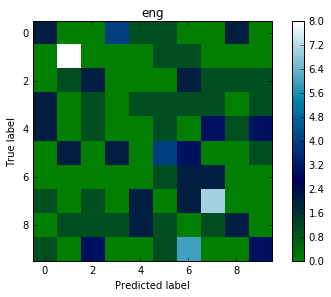

In [68]:
from sklearn.cross_validation import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.ocean):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

depth = 15
learners = 100
f = 'eng'
rf = RandomForestClassifier(n_estimators = learners, max_depth = depth, warm_start = False)
rf.fit(trX[f],trY) # NOTE DATA ORIENTATION


print('feature {}, train data accuracy {}, test accuracy {}'.format(f, rf.score(trX[f], trY), rf.score(teX[f], teY)))
plot_confusion_matrix(confusion_matrix(teY, rf.predict(teX[f])), title=f)


feature hcdf, train data accuracy 1.0, test accuracy 0.31


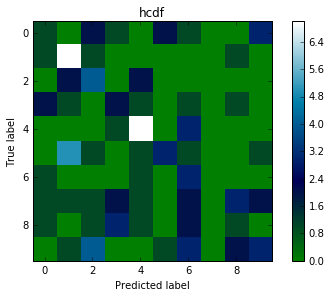

In [69]:
from sklearn.cross_validation import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.ocean):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

depth = 15
learners = 100
f = 'hcdf'
rf = RandomForestClassifier(n_estimators = learners, max_depth = depth, warm_start = False)
rf.fit(trX[f],trY) # NOTE DATA ORIENTATION


print('feature {}, train data accuracy {}, test accuracy {}'.format(f, rf.score(trX[f], trY), rf.score(teX[f], teY)))
plot_confusion_matrix(confusion_matrix(teY, rf.predict(teX[f])), title=f)


feature roughness, train data accuracy 1.0, test accuracy 0.36


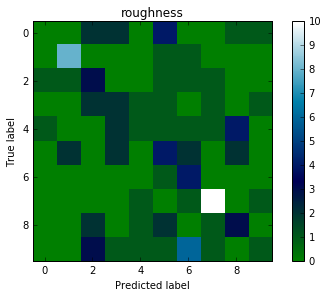

In [70]:
from sklearn.cross_validation import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.ocean):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

depth = 15
learners = 100
f = 'roughness'
rf = RandomForestClassifier(n_estimators = learners, max_depth = depth, warm_start = False)
rf.fit(trX[f],trY) # NOTE DATA ORIENTATION


print('feature {}, train data accuracy {}, test accuracy {}'.format(f, rf.score(trX[f], trY), rf.score(teX[f], teY)))
plot_confusion_matrix(confusion_matrix(teY, rf.predict(teX[f])), title=f)
